In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))
from env.env_gym import GuestEnv

In [3]:
def run_env(env, actions, steps=100, seed=42):
    obs, info = env.reset(seed=seed)
    phonemes, rewards = [], []
    for i in range(steps):
        act = actions[i] if i < len(actions) else actions[-1]
        obs, reward, terminated, truncated, info = env.step(act)
        phonemes.append(info['phoneme'].copy())
        rewards.append(reward)
        if terminated or truncated:
            break
    return np.array(phonemes), np.array(rewards)

def plot_results(phonemes, rewards, title):
    steps = np.arange(len(rewards))
    plt.figure(figsize=(9,4))
    for a in range(phonemes.shape[1]):
        plt.plot(steps, phonemes[:, a], label=f'Agent {a}')
    plt.xlabel('Step'); plt.ylabel('Phonemes'); plt.title(title + ' - Phonemes')
    plt.legend(); plt.grid(True); plt.show()
    plt.figure(figsize=(9,4))
    plt.plot(steps, rewards, label='Reward')
    plt.xlabel('Step'); plt.ylabel('Reward'); plt.title(title + ' - Reward')
    plt.grid(True); plt.show()

# Baseline

In [3]:
# Create environment
env = GuestEnv(max_steps=100, reward_shaping=False)  # Shorter episodes for more frequent logging
actions = [0]*100
p, r = run_env(env, actions)

2025-12-06 15:39:50 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])


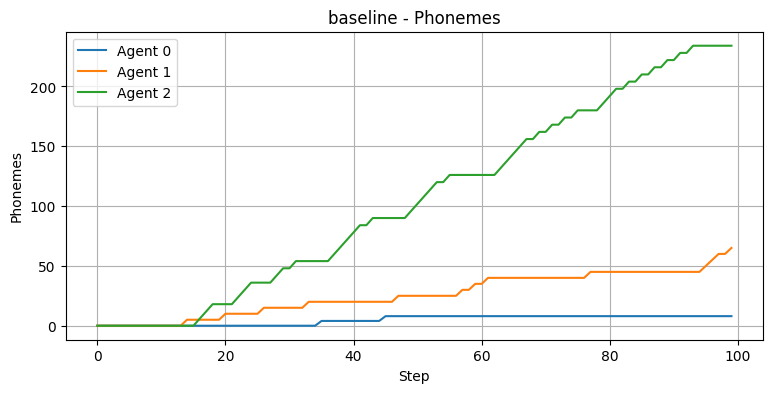

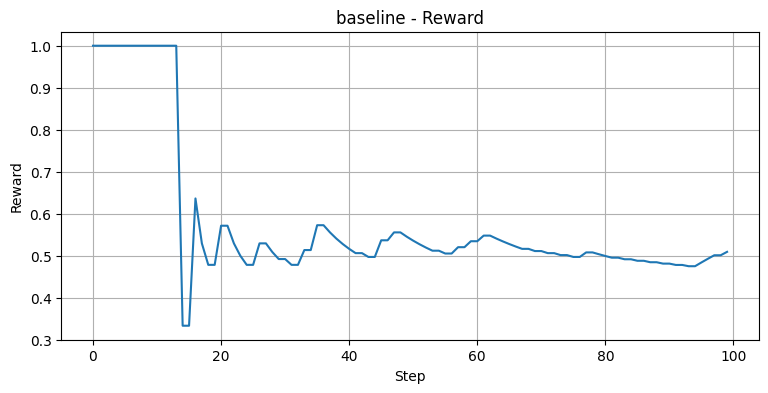

In [4]:
plot_results(p, r, 'baseline')

# Test new baseline

In [29]:
# Create environment
env_test = GuestEnv(max_steps=5000, reward_shaping=False, seed=42)  # Shorter episodes for more frequent logging

env_test.agent_params[0].update({  # quiet analyst
    "min_energy_to_speak": 0.0,
    "energy_gain": 0.0,
    "energy_decay": 0.008,
    "max_speaking_time": 5,
    "phonemes_per_step": 2,
    })

env_test.agent_params[1].update({  # balanced mediator
        "min_energy_to_speak": 0.0,
        "energy_gain": 0.0,
        "energy_decay": 0.005,
        "max_speaking_time": 5,
        "phonemes_per_step": 5,
    })

env_test.agent_params[2].update({  # energetic storyteller
        "min_energy_to_speak": 0.0,
        "energy_gain": 0.0,
        "energy_decay": 0.003,
        "max_speaking_time": 5,
        "phonemes_per_step": 10,
    })

actions = [0]*500
p, r = run_env(env_test, actions,steps=5000)

2025-12-06 15:44:59 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])
2025-12-06 15:44:59 | INFO | self.energy=array([0., 0., 0.]) - step <bound method GuestEnv.step of <env.env_gym.GuestEnv object at 0x793ca57d0190>>
2025-12-06 15:44:59 | INFO | self.energy=array([0., 0., 0.]) - step <bound method GuestEnv.step of <env.env_gym.GuestEnv object at 0x793ca57d0190>>
2025-12-06 15:44:59 | INFO | self.energy=array([0., 0., 0.]) - step <bound method GuestEnv.step of <env.env_gym.GuestEnv object at 0x793ca57d0190>>
2025-12-06 15:44:59 | INFO | self.energy=array([0., 0., 0.]) - step <bound method GuestEnv.step of <env.env_gym.GuestEnv object at 0x793ca57d0190>>
2025-12-06 15:44:59 | INFO | self.energy=array([0., 0., 0.]) - step <bound method GuestEnv.step of <env.env_gym.GuestEnv object at 0x793ca57d0190>>
2025-12-06 15:44:59 | INFO | self.energy=array([0., 0., 0.]) - step <bound method GuestEnv.step of <env.env_gym.GuestEnv object at 0x793ca57d0190>>
2025-12-06 15:44:59 | INFO 

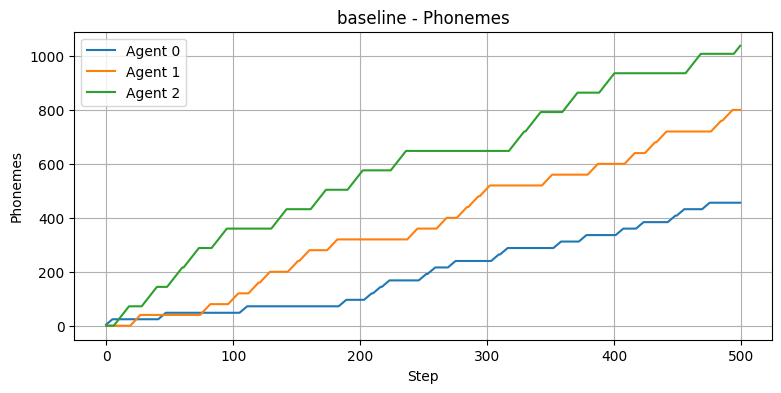

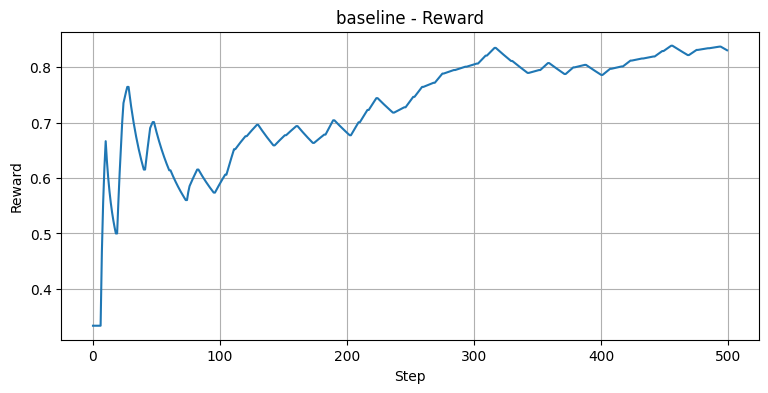

In [13]:
plot_results(p, r, 'baseline')

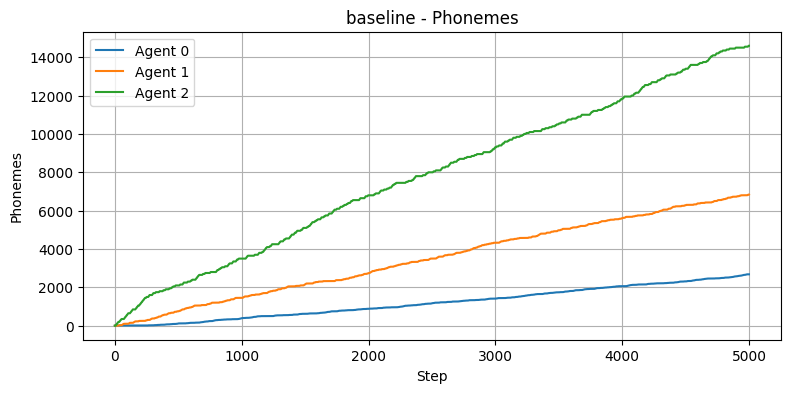

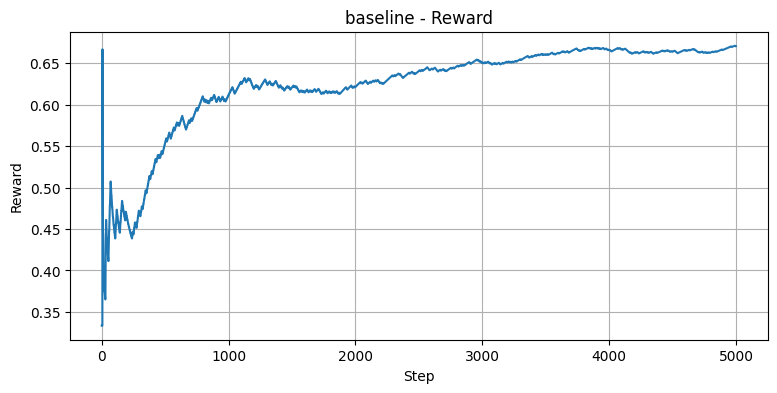

In [30]:
plot_results(p, r, 'baseline')

# Find gold number

In [ ]:
# Create environment
env_gold_number = GuestEnv(max_steps=5000, reward_shaping=False, seed=42)  # Shorter episodes for more frequent logging

env_gold_number.agent_params[0].update({  # quiet analyst
    "min_energy_to_speak": 0.20,
    "energy_gain": 0.0018,
    "energy_decay": 0.09,
    "max_speaking_time": 6,
    "phonemes_per_step": 4,
    })

env_gold_number.agent_params[1].update({  # balanced mediator
        "min_energy_to_speak": 0.55,
        "energy_gain": 0.010,
        "energy_decay": 0.05,
        "max_speaking_time": 8,
        "phonemes_per_step": 5,
    })

env_gold_number.agent_params[2].update({  # energetic storyteller
        "min_energy_to_speak": 0.85,
        "energy_gain": 0.030,
        "energy_decay": 0.025,
        "max_speaking_time": 12,
        "phonemes_per_step": 6,
    })

actions = [0]*5000
pb, rb = run_env(env_gold_number, actions,steps=5000)

2025-12-06 16:35:53 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])


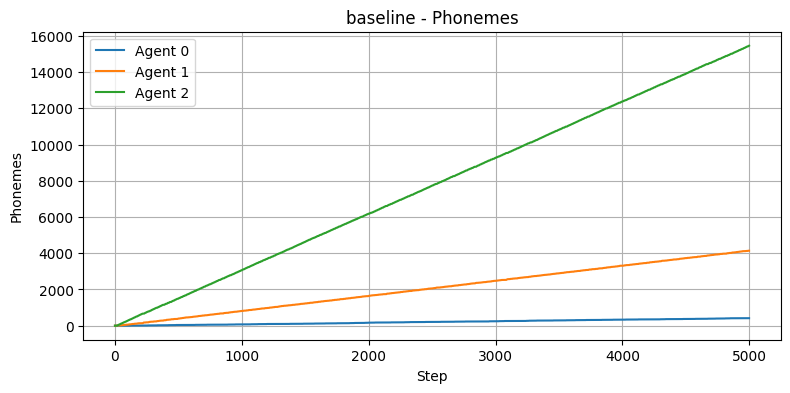

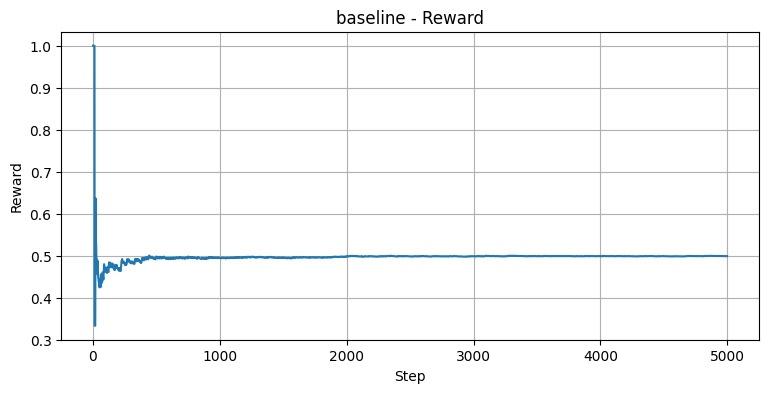

In [5]:
plot_results(pb, rb, 'baseline')

In [8]:
# Create environment
env_gold_number_2 = GuestEnv(max_steps=5000, reward_shaping=False, seed=42)  # Shorter episodes for more frequent logging

env_gold_number_2.agent_params[0].update({  # quiet analyst
    "min_energy_to_speak": 0.0,
    "energy_gain": 0.0,
    "energy_decay": 0.09,
    "max_speaking_time": 6,
    "phonemes_per_step": 4,
    })

env_gold_number_2.agent_params[1].update({  # balanced mediator
        "min_energy_to_speak": 0.0,
        "energy_gain": 0.0,
        "energy_decay": 0.05,
        "max_speaking_time": 8,
        "phonemes_per_step": 5,
    })

env_gold_number_2.agent_params[2].update({  # energetic storyteller
        "min_energy_to_speak": 0.0,
        "energy_gain": 0.0,
        "energy_decay": 0.025,
        "max_speaking_time": 12,
        "phonemes_per_step": 6,
    })

actions = [0]*5000
pb2, rb2 = run_env(env_gold_number_2, actions,steps=5000)

2025-12-06 16:39:14 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])
2025-12-06 16:39:14 | INFO | self.energy=array([0., 0., 0.]) - step <bound method GuestEnv.step of <env.env_gym.GuestEnv object at 0x7fc30cfa1810>>
2025-12-06 16:39:14 | INFO | self.energy=array([0., 0., 0.]) - step <bound method GuestEnv.step of <env.env_gym.GuestEnv object at 0x7fc30cfa1810>>
2025-12-06 16:39:14 | INFO | self.energy=array([0., 0., 0.]) - step <bound method GuestEnv.step of <env.env_gym.GuestEnv object at 0x7fc30cfa1810>>
2025-12-06 16:39:14 | INFO | self.energy=array([0., 0., 0.]) - step <bound method GuestEnv.step of <env.env_gym.GuestEnv object at 0x7fc30cfa1810>>
2025-12-06 16:39:14 | INFO | self.energy=array([0., 0., 0.]) - step <bound method GuestEnv.step of <env.env_gym.GuestEnv object at 0x7fc30cfa1810>>
2025-12-06 16:39:14 | INFO | self.energy=array([0., 0., 0.]) - step <bound method GuestEnv.step of <env.env_gym.GuestEnv object at 0x7fc30cfa1810>>
2025-12-06 16:39:14 | INFO 

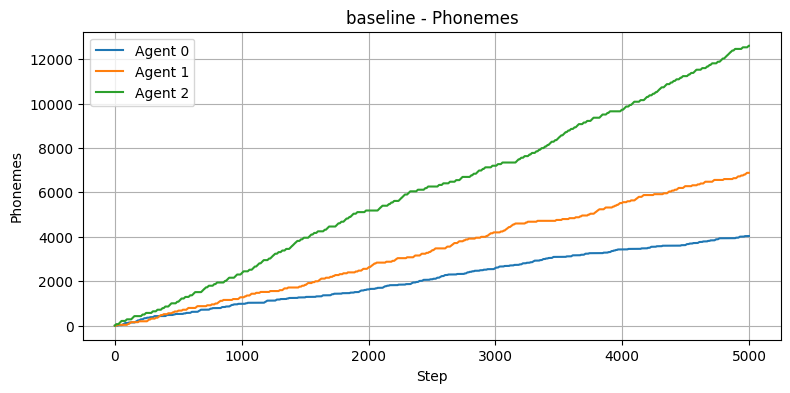

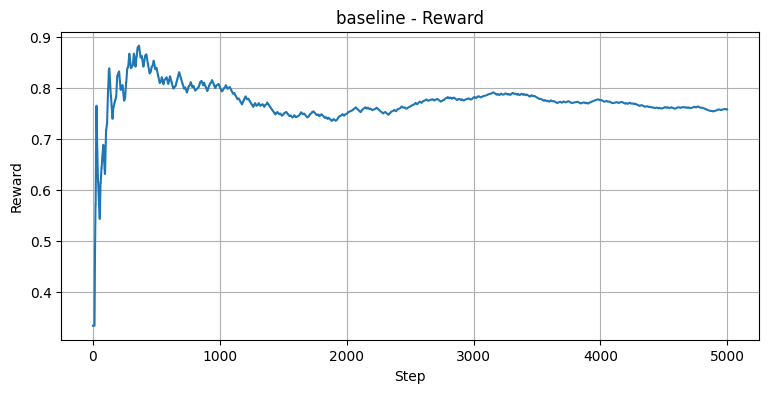

In [9]:
plot_results(pb2, rb2, 'baseline')

In [10]:
# Create environment
env_gold_number_3 = GuestEnv(max_steps=5000, reward_shaping=False, seed=42)  # Shorter episodes for more frequent logging

env_gold_number_3.agent_params[0].update({  # quiet analyst
    "min_energy_to_speak": 0.20,
    "energy_gain": 0.0,
    "energy_decay": 0.09,
    "max_speaking_time": 6,
    "phonemes_per_step": 4,
    })

env_gold_number_3.agent_params[1].update({  # balanced mediator
        "min_energy_to_speak": 0.55,
        "energy_gain": 0.0,
        "energy_decay": 0.05,
        "max_speaking_time": 8,
        "phonemes_per_step": 5,
    })

env_gold_number_3.agent_params[2].update({  # energetic storyteller
        "min_energy_to_speak": 0.85,
        "energy_gain": 0.0,
        "energy_decay": 0.025,
        "max_speaking_time": 12,
        "phonemes_per_step": 6,
    })

actions = [0]*5000
pb3, rb3 = run_env(env_gold_number_3, actions,steps=5000)

2025-12-06 16:42:47 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])


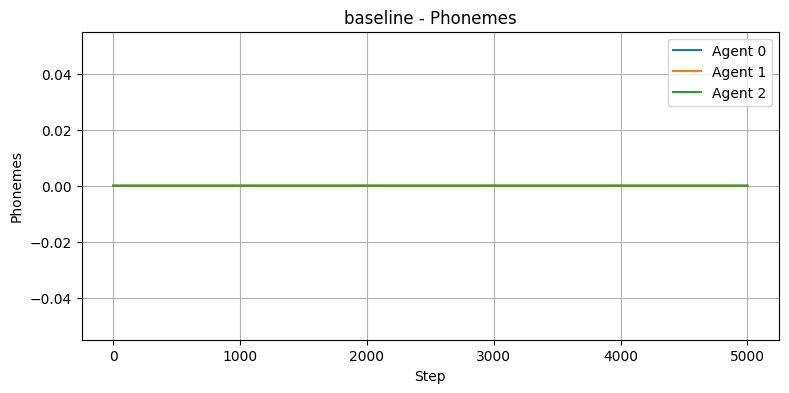

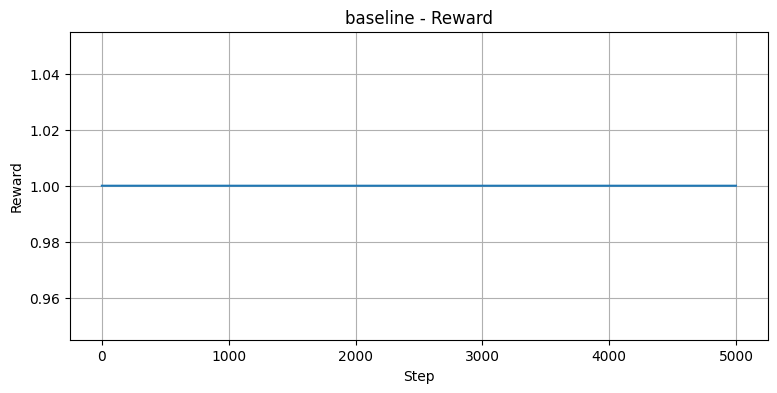

In [11]:
plot_results(pb3, rb3, 'baseline')

# Test Random Agent 

2025-12-07 09:58:41 | INFO | in function - self.agent_params={0: {'min_energy_to_speak': 0.85, 'energy_gain': 0.03, 'energy_decay': 0.025, 'max_speaking_time': 12, 'phonemes_per_step': 6}, 1: {'min_energy_to_speak': 0.55, 'energy_gain': 0.01, 'energy_decay': 0.05, 'max_speaking_time': 8, 'phonemes_per_step': 5}, 2: {'min_energy_to_speak': 0.2, 'energy_gain': 0.0018, 'energy_decay': 0.09, 'max_speaking_time': 6, 'phonemes_per_step': 4}}
2025-12-07 09:58:41 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])
2025-12-07 09:58:41 | INFO | self.agent_params={0: {'min_energy_to_speak': 0.85, 'energy_gain': 0.03, 'energy_decay': 0.025, 'max_speaking_time': 12, 'phonemes_per_step': 6}, 1: {'min_energy_to_speak': 0.55, 'energy_gain': 0.01, 'energy_decay': 0.05, 'max_speaking_time': 8, 'phonemes_per_step': 5}, 2: {'min_energy_to_speak': 0.2, 'energy_gain': 0.0018, 'energy_decay': 0.09, 'max_speaking_time': 6, 'phonemes_per_step': 4}}


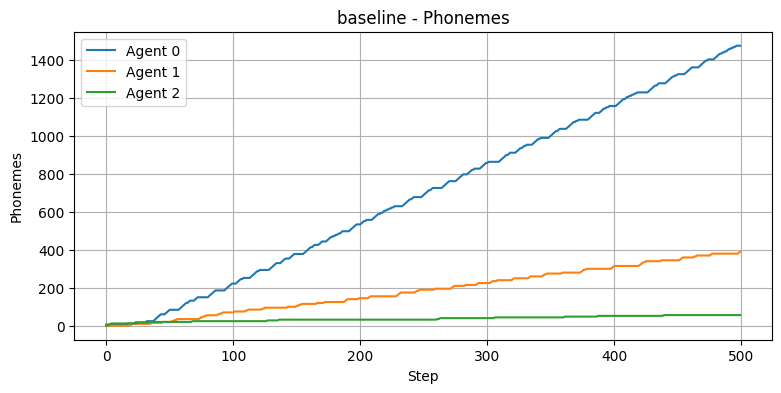

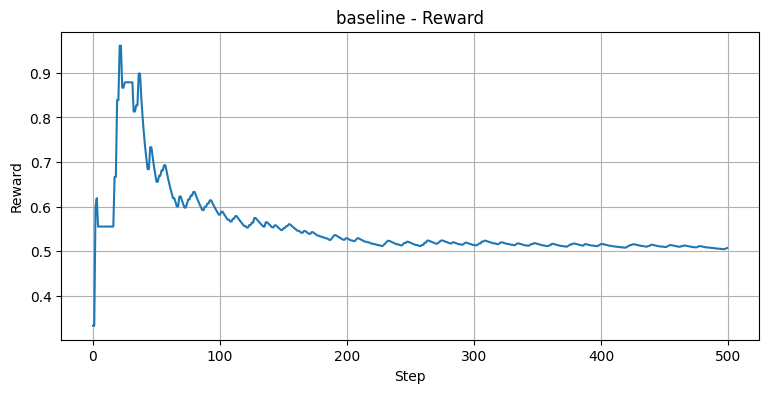

2025-12-07 09:58:41 | INFO | in function - self.agent_params={0: {'min_energy_to_speak': 0.85, 'energy_gain': 0.03, 'energy_decay': 0.025, 'max_speaking_time': 12, 'phonemes_per_step': 6}, 1: {'min_energy_to_speak': 0.55, 'energy_gain': 0.01, 'energy_decay': 0.05, 'max_speaking_time': 8, 'phonemes_per_step': 5}, 2: {'min_energy_to_speak': 0.2, 'energy_gain': 0.0018, 'energy_decay': 0.09, 'max_speaking_time': 6, 'phonemes_per_step': 4}}
2025-12-07 09:58:41 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])
2025-12-07 09:58:41 | INFO | self.agent_params={0: {'min_energy_to_speak': 0.85, 'energy_gain': 0.03, 'energy_decay': 0.025, 'max_speaking_time': 12, 'phonemes_per_step': 6}, 1: {'min_energy_to_speak': 0.55, 'energy_gain': 0.01, 'energy_decay': 0.05, 'max_speaking_time': 8, 'phonemes_per_step': 5}, 2: {'min_energy_to_speak': 0.2, 'energy_gain': 0.0018, 'energy_decay': 0.09, 'max_speaking_time': 6, 'phonemes_per_step': 4}}


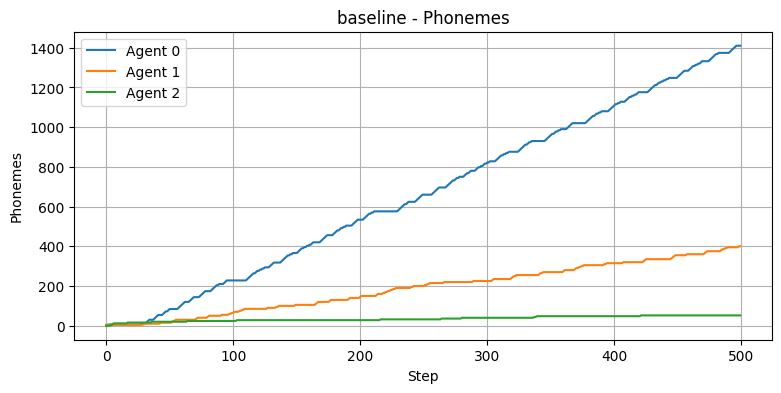

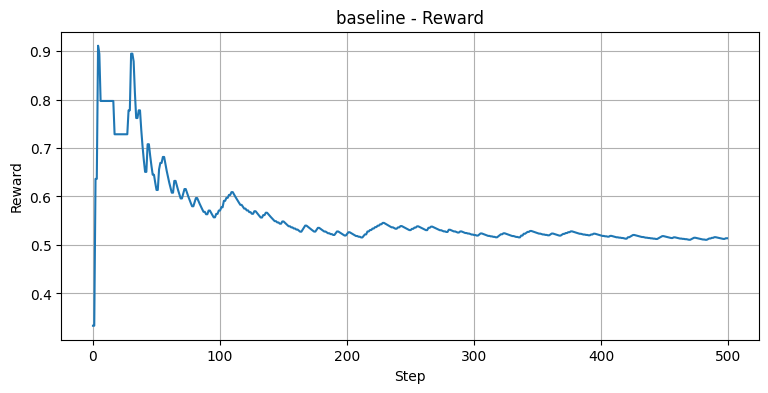

2025-12-07 09:58:41 | INFO | in function - self.agent_params={0: {'min_energy_to_speak': 0.85, 'energy_gain': 0.03, 'energy_decay': 0.025, 'max_speaking_time': 12, 'phonemes_per_step': 6}, 1: {'min_energy_to_speak': 0.55, 'energy_gain': 0.01, 'energy_decay': 0.05, 'max_speaking_time': 8, 'phonemes_per_step': 5}, 2: {'min_energy_to_speak': 0.2, 'energy_gain': 0.0018, 'energy_decay': 0.09, 'max_speaking_time': 6, 'phonemes_per_step': 4}}
2025-12-07 09:58:41 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])
2025-12-07 09:58:41 | INFO | self.agent_params={0: {'min_energy_to_speak': 0.85, 'energy_gain': 0.03, 'energy_decay': 0.025, 'max_speaking_time': 12, 'phonemes_per_step': 6}, 1: {'min_energy_to_speak': 0.55, 'energy_gain': 0.01, 'energy_decay': 0.05, 'max_speaking_time': 8, 'phonemes_per_step': 5}, 2: {'min_energy_to_speak': 0.2, 'energy_gain': 0.0018, 'energy_decay': 0.09, 'max_speaking_time': 6, 'phonemes_per_step': 4}}


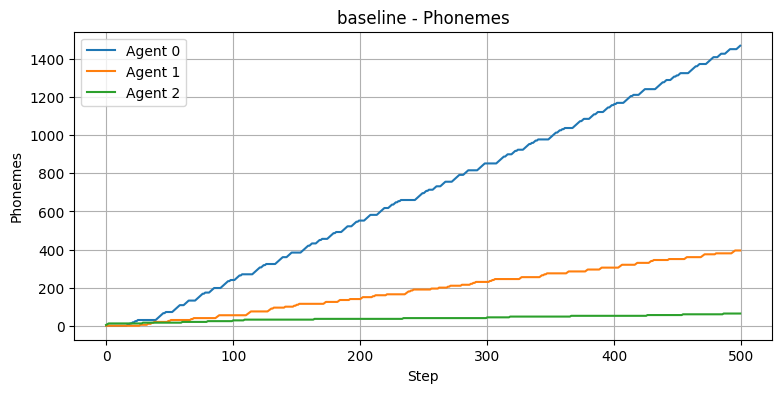

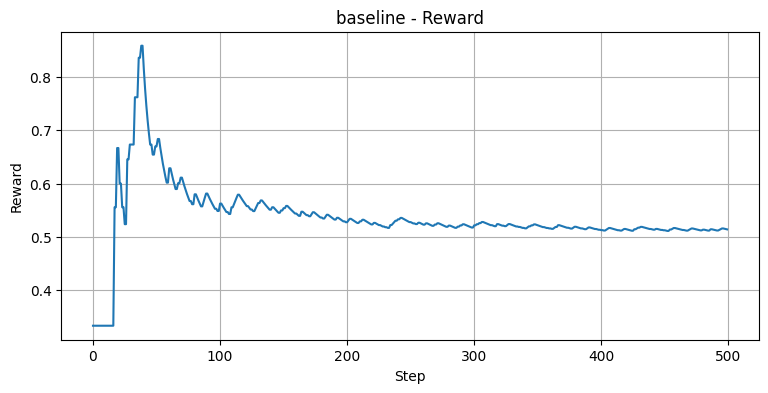

2025-12-07 09:58:42 | INFO | in function - self.agent_params={0: {'min_energy_to_speak': 0.55, 'energy_gain': 0.01, 'energy_decay': 0.05, 'max_speaking_time': 8, 'phonemes_per_step': 5}, 1: {'min_energy_to_speak': 0.85, 'energy_gain': 0.03, 'energy_decay': 0.025, 'max_speaking_time': 12, 'phonemes_per_step': 6}, 2: {'min_energy_to_speak': 0.2, 'energy_gain': 0.0018, 'energy_decay': 0.09, 'max_speaking_time': 6, 'phonemes_per_step': 4}}
2025-12-07 09:58:42 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])
2025-12-07 09:58:42 | INFO | self.agent_params={0: {'min_energy_to_speak': 0.55, 'energy_gain': 0.01, 'energy_decay': 0.05, 'max_speaking_time': 8, 'phonemes_per_step': 5}, 1: {'min_energy_to_speak': 0.85, 'energy_gain': 0.03, 'energy_decay': 0.025, 'max_speaking_time': 12, 'phonemes_per_step': 6}, 2: {'min_energy_to_speak': 0.2, 'energy_gain': 0.0018, 'energy_decay': 0.09, 'max_speaking_time': 6, 'phonemes_per_step': 4}}


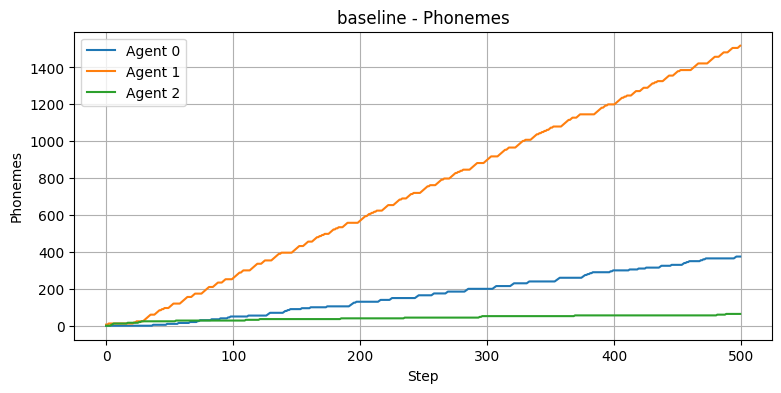

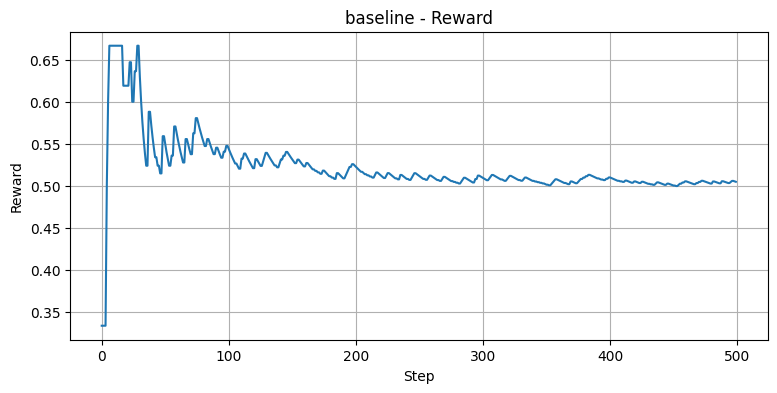

2025-12-07 09:58:42 | INFO | in function - self.agent_params={0: {'min_energy_to_speak': 0.2, 'energy_gain': 0.0018, 'energy_decay': 0.09, 'max_speaking_time': 6, 'phonemes_per_step': 4}, 1: {'min_energy_to_speak': 0.85, 'energy_gain': 0.03, 'energy_decay': 0.025, 'max_speaking_time': 12, 'phonemes_per_step': 6}, 2: {'min_energy_to_speak': 0.55, 'energy_gain': 0.01, 'energy_decay': 0.05, 'max_speaking_time': 8, 'phonemes_per_step': 5}}
2025-12-07 09:58:42 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])
2025-12-07 09:58:42 | INFO | self.agent_params={0: {'min_energy_to_speak': 0.2, 'energy_gain': 0.0018, 'energy_decay': 0.09, 'max_speaking_time': 6, 'phonemes_per_step': 4}, 1: {'min_energy_to_speak': 0.85, 'energy_gain': 0.03, 'energy_decay': 0.025, 'max_speaking_time': 12, 'phonemes_per_step': 6}, 2: {'min_energy_to_speak': 0.55, 'energy_gain': 0.01, 'energy_decay': 0.05, 'max_speaking_time': 8, 'phonemes_per_step': 5}}


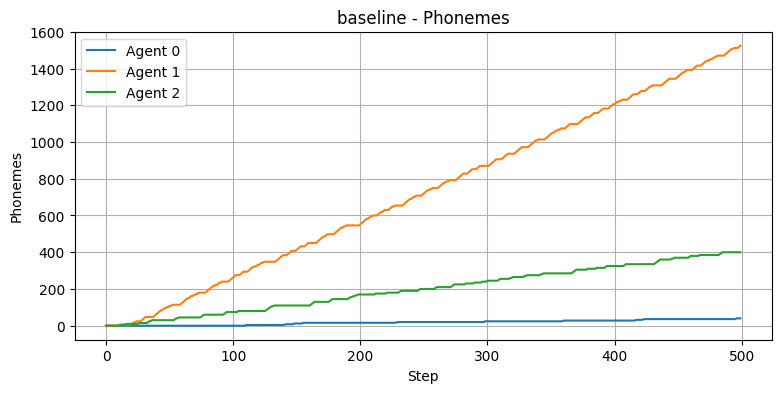

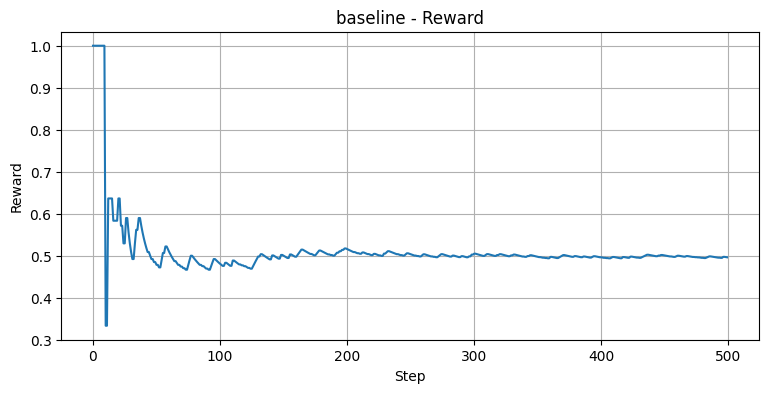

2025-12-07 09:58:43 | INFO | in function - self.agent_params={0: {'min_energy_to_speak': 0.2, 'energy_gain': 0.0018, 'energy_decay': 0.09, 'max_speaking_time': 6, 'phonemes_per_step': 4}, 1: {'min_energy_to_speak': 0.55, 'energy_gain': 0.01, 'energy_decay': 0.05, 'max_speaking_time': 8, 'phonemes_per_step': 5}, 2: {'min_energy_to_speak': 0.85, 'energy_gain': 0.03, 'energy_decay': 0.025, 'max_speaking_time': 12, 'phonemes_per_step': 6}}
2025-12-07 09:58:43 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])
2025-12-07 09:58:43 | INFO | self.agent_params={0: {'min_energy_to_speak': 0.2, 'energy_gain': 0.0018, 'energy_decay': 0.09, 'max_speaking_time': 6, 'phonemes_per_step': 4}, 1: {'min_energy_to_speak': 0.55, 'energy_gain': 0.01, 'energy_decay': 0.05, 'max_speaking_time': 8, 'phonemes_per_step': 5}, 2: {'min_energy_to_speak': 0.85, 'energy_gain': 0.03, 'energy_decay': 0.025, 'max_speaking_time': 12, 'phonemes_per_step': 6}}


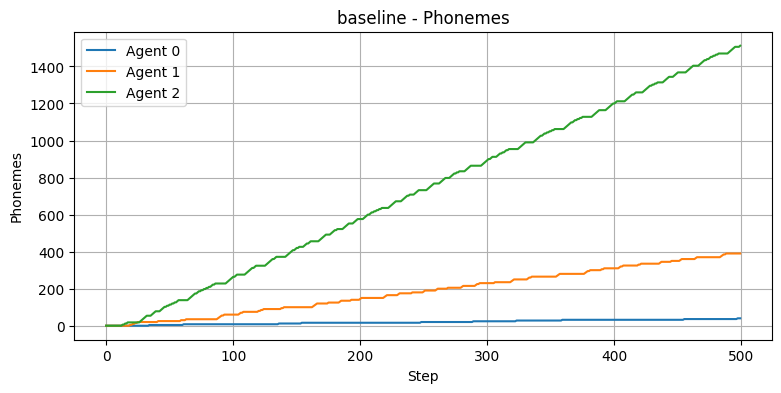

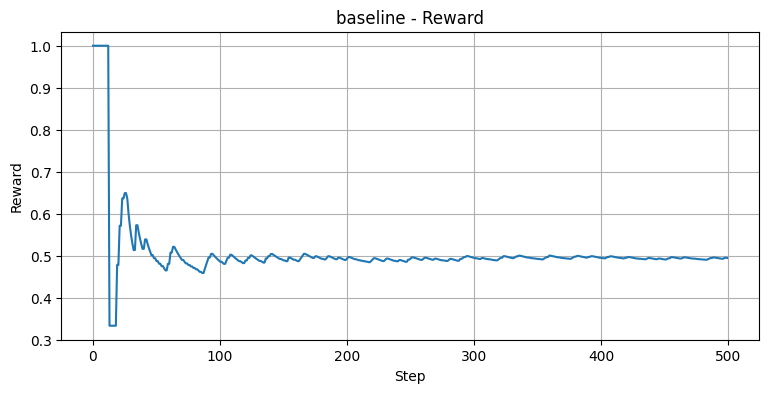

2025-12-07 09:58:43 | INFO | in function - self.agent_params={0: {'min_energy_to_speak': 0.2, 'energy_gain': 0.0018, 'energy_decay': 0.09, 'max_speaking_time': 6, 'phonemes_per_step': 4}, 1: {'min_energy_to_speak': 0.55, 'energy_gain': 0.01, 'energy_decay': 0.05, 'max_speaking_time': 8, 'phonemes_per_step': 5}, 2: {'min_energy_to_speak': 0.85, 'energy_gain': 0.03, 'energy_decay': 0.025, 'max_speaking_time': 12, 'phonemes_per_step': 6}}
2025-12-07 09:58:43 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])
2025-12-07 09:58:43 | INFO | self.agent_params={0: {'min_energy_to_speak': 0.2, 'energy_gain': 0.0018, 'energy_decay': 0.09, 'max_speaking_time': 6, 'phonemes_per_step': 4}, 1: {'min_energy_to_speak': 0.55, 'energy_gain': 0.01, 'energy_decay': 0.05, 'max_speaking_time': 8, 'phonemes_per_step': 5}, 2: {'min_energy_to_speak': 0.85, 'energy_gain': 0.03, 'energy_decay': 0.025, 'max_speaking_time': 12, 'phonemes_per_step': 6}}


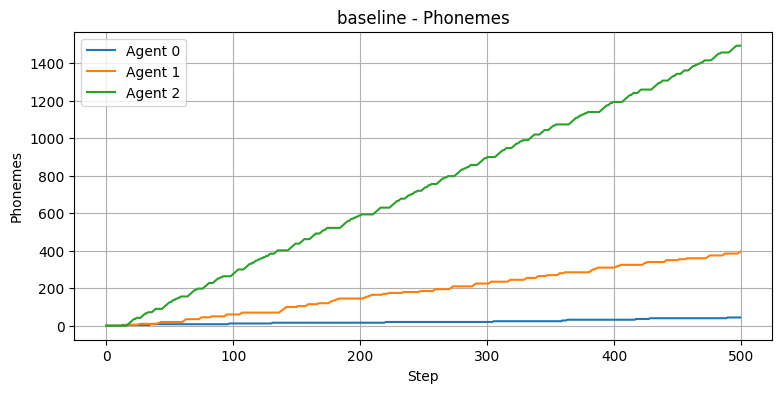

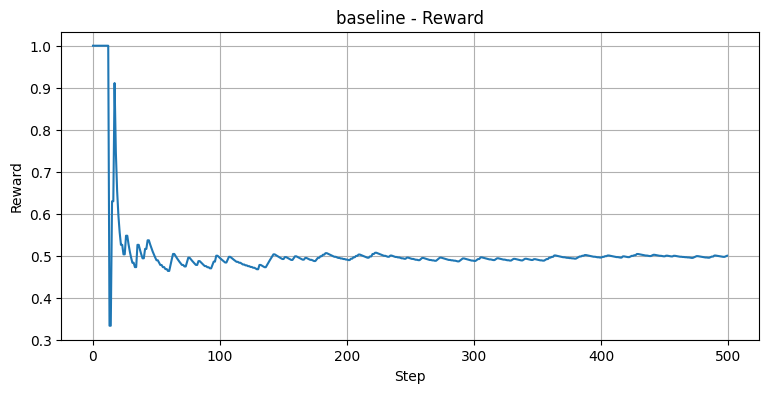

2025-12-07 09:58:43 | INFO | in function - self.agent_params={0: {'min_energy_to_speak': 0.55, 'energy_gain': 0.01, 'energy_decay': 0.05, 'max_speaking_time': 8, 'phonemes_per_step': 5}, 1: {'min_energy_to_speak': 0.2, 'energy_gain': 0.0018, 'energy_decay': 0.09, 'max_speaking_time': 6, 'phonemes_per_step': 4}, 2: {'min_energy_to_speak': 0.85, 'energy_gain': 0.03, 'energy_decay': 0.025, 'max_speaking_time': 12, 'phonemes_per_step': 6}}
2025-12-07 09:58:43 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])
2025-12-07 09:58:43 | INFO | self.agent_params={0: {'min_energy_to_speak': 0.55, 'energy_gain': 0.01, 'energy_decay': 0.05, 'max_speaking_time': 8, 'phonemes_per_step': 5}, 1: {'min_energy_to_speak': 0.2, 'energy_gain': 0.0018, 'energy_decay': 0.09, 'max_speaking_time': 6, 'phonemes_per_step': 4}, 2: {'min_energy_to_speak': 0.85, 'energy_gain': 0.03, 'energy_decay': 0.025, 'max_speaking_time': 12, 'phonemes_per_step': 6}}


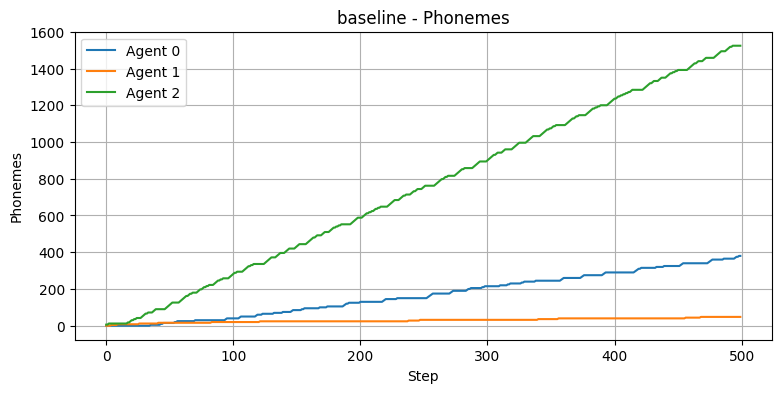

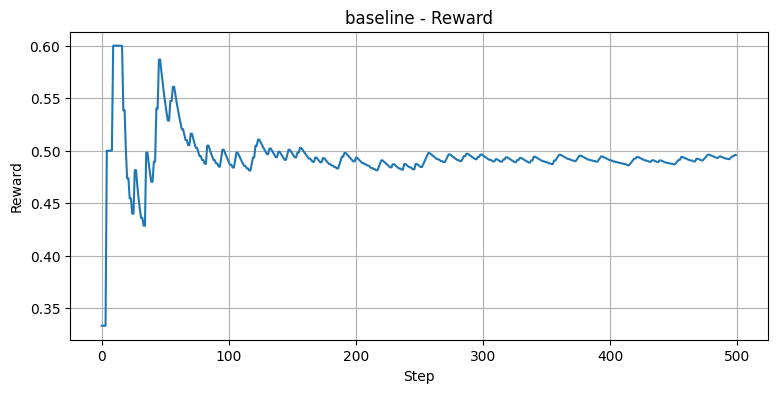

2025-12-07 09:58:44 | INFO | in function - self.agent_params={0: {'min_energy_to_speak': 0.2, 'energy_gain': 0.0018, 'energy_decay': 0.09, 'max_speaking_time': 6, 'phonemes_per_step': 4}, 1: {'min_energy_to_speak': 0.55, 'energy_gain': 0.01, 'energy_decay': 0.05, 'max_speaking_time': 8, 'phonemes_per_step': 5}, 2: {'min_energy_to_speak': 0.85, 'energy_gain': 0.03, 'energy_decay': 0.025, 'max_speaking_time': 12, 'phonemes_per_step': 6}}
2025-12-07 09:58:44 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])
2025-12-07 09:58:44 | INFO | self.agent_params={0: {'min_energy_to_speak': 0.2, 'energy_gain': 0.0018, 'energy_decay': 0.09, 'max_speaking_time': 6, 'phonemes_per_step': 4}, 1: {'min_energy_to_speak': 0.55, 'energy_gain': 0.01, 'energy_decay': 0.05, 'max_speaking_time': 8, 'phonemes_per_step': 5}, 2: {'min_energy_to_speak': 0.85, 'energy_gain': 0.03, 'energy_decay': 0.025, 'max_speaking_time': 12, 'phonemes_per_step': 6}}


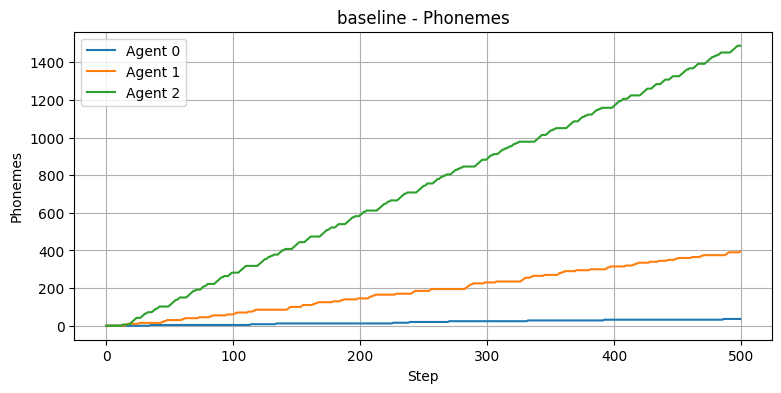

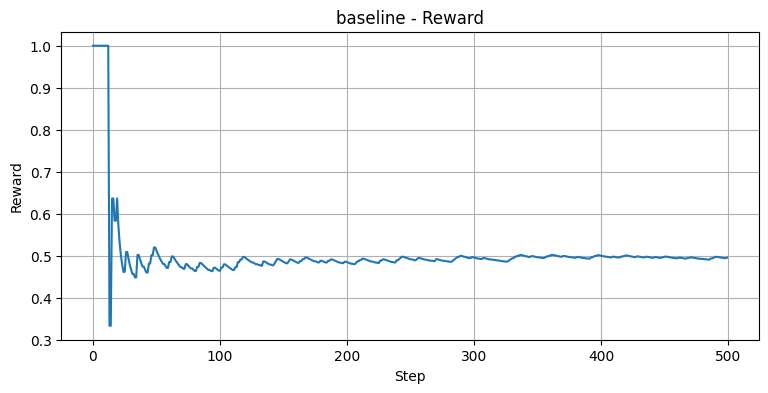

2025-12-07 09:58:44 | INFO | in function - self.agent_params={0: {'min_energy_to_speak': 0.2, 'energy_gain': 0.0018, 'energy_decay': 0.09, 'max_speaking_time': 6, 'phonemes_per_step': 4}, 1: {'min_energy_to_speak': 0.85, 'energy_gain': 0.03, 'energy_decay': 0.025, 'max_speaking_time': 12, 'phonemes_per_step': 6}, 2: {'min_energy_to_speak': 0.55, 'energy_gain': 0.01, 'energy_decay': 0.05, 'max_speaking_time': 8, 'phonemes_per_step': 5}}
2025-12-07 09:58:44 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])
2025-12-07 09:58:44 | INFO | self.agent_params={0: {'min_energy_to_speak': 0.2, 'energy_gain': 0.0018, 'energy_decay': 0.09, 'max_speaking_time': 6, 'phonemes_per_step': 4}, 1: {'min_energy_to_speak': 0.85, 'energy_gain': 0.03, 'energy_decay': 0.025, 'max_speaking_time': 12, 'phonemes_per_step': 6}, 2: {'min_energy_to_speak': 0.55, 'energy_gain': 0.01, 'energy_decay': 0.05, 'max_speaking_time': 8, 'phonemes_per_step': 5}}


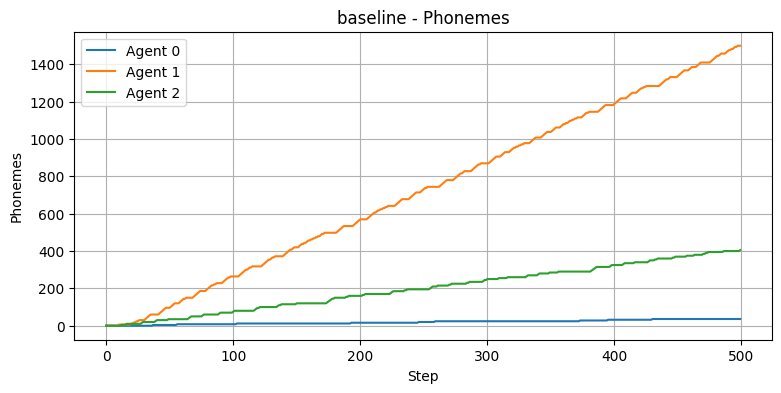

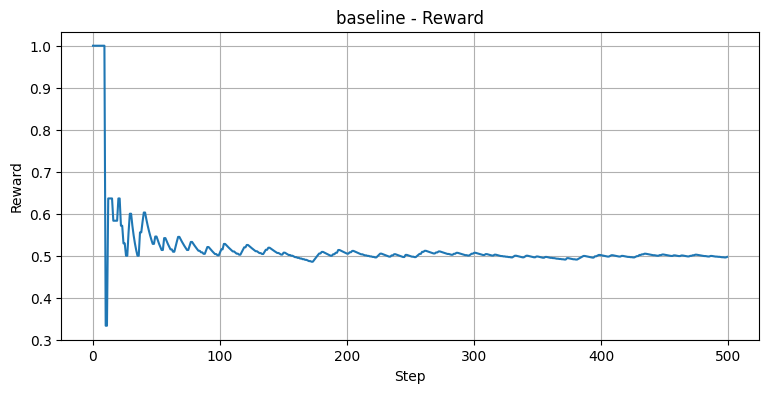

In [6]:
# Create environment
for _ in range(10):
    rnd_agent = GuestEnv(max_steps=500, reward_shaping=False, seed=42, randomize_agent=True)
    actions = [0]*500
    rnd_p, rnd_r = run_env(rnd_agent, actions,steps=500)
    plot_results(rnd_p, rnd_r, 'baseline')